### Importing modules and dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project3: Classification/Mobile Prediction/data_mobile_price_range.csv')

In [ ]:
df = df.rename(columns={'battery_power':'battery_power(mAh)','blue':'bluetooth','clock_speed':'clock_speed(GHz)','fc':'front_camera(MP)','four_g':'4G','int_memory':'int_memory(GB)','m_dep':'mob_dep(cm)','n_cores':'core_proc','pc':'rear_camera(MP)','sc_h':'screen_height(cm)','sc_w':'screen_width(cm)','talk_time':'talk_time(battery)','three_g':'3G'})

### Understanding dataset

In [ ]:
df.head()

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape  # 2000 rows and 21 columns

(2000, 21)

In [ ]:
df.columns

Index(['battery_power(mAh)', 'bluetooth', 'clock_speed(GHz)', 'dual_sim',
       'front_camera(MP)', '4G', 'int_memory(GB)', 'mob_dep(cm)', 'mobile_wt',
       'core_proc', 'rear_camera(MP)', 'px_height', 'px_width', 'ram',
       'screen_height(cm)', 'screen_width(cm)', 'talk_time(battery)', '3G',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power(mAh)  2000 non-null   int64  
 1   bluetooth           2000 non-null   int64  
 2   clock_speed(GHz)    2000 non-null   float64
 3   dual_sim            2000 non-null   int64  
 4   front_camera(MP)    2000 non-null   int64  
 5   4G                  2000 non-null   int64  
 6   int_memory(GB)      2000 non-null   int64  
 7   mob_dep(cm)         2000 non-null   float64
 8   mobile_wt           2000 non-null   int64  
 9   core_proc           2000 non-null   int64  
 10  rear_camera(MP)     2000 non-null   int64  
 11  px_height           2000 non-null   int64  
 12  px_width            2000 non-null   int64  
 13  ram                 2000 non-null   int64  
 14  screen_height(cm)   2000 non-null   int64  
 15  screen_width(cm)    2000 non-null   int64  
 16  talk_t

Observations:
1. Numerical Columns: 11 Int and 2 Floats; Categorical Columns: 6 Dichotomous and 1 Ordinal.
2. No null value found.

In [ ]:
df['4G'].value_counts()

1    1043
0     957
Name: 4G, dtype: int64

In [ ]:
df['3G'].value_counts()

1    1523
0     477
Name: 3G, dtype: int64

In [ ]:
df['4G'].value_counts()[1] + df['3G'].value_counts()[1]

2566

### Note: There is inconsistancy in the count of 3G and 4G phones. So, let's explore it more

In [ ]:
# Creating new column 2G to original dataset
no_4G = df[df['4G']==0]
_2G_df = no_4G[no_4G['3G']==0]
_3G_df = no_4G[no_4G['3G']==1]
_4G_df = df[df['4G']==1]
no_4G = df[df['4G']==0]

_2G_df = no_4G[no_4G['3G']==0]
df['2G'] = 0
_2G_df['2G'] = 1
df.loc[_2G_df.index,'2G'] = _2G_df['2G']
_4G_df['3G'] = 0
df.loc[_4G_df.index,'3G'] = _4G_df['3G']

<ipython-input-11-d7ad83fc1d6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _2G_df['2G'] = 1
<ipython-input-11-d7ad83fc1d6e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _4G_df['3G'] = 0


In [ ]:
#df.to_csv('final_dataset.csv')

In [ ]:
df['4G'].value_counts()[1] + df['3G'].value_counts()[1] + df['2G'].value_counts()[1]

2000

##### No. of phones with different generations (Total 2000)
4G Phones = 1043;   3G Phones = 480;   2G Phones = 477

#### Now the count is consitant with the total count of column values

### Classifying columns on the basis of dependency

In [ ]:
dependent_column = ['price_range']  # Ordinal Data
independent_columns = ['battery_power(mAh)', 'bluetooth', 'clock_speed(GHz)', 'dual_sim',
       'front_camera(MP)', '4G', 'int_memory(GB)', 'mob_dep(cm)', 'mobile_wt',
       'core_proc', 'rear_camera(MP)', 'px_height', 'px_width', 'ram',
       'screen_height(cm)', 'screen_width(cm)', 'talk_time(battery)', '3G',
       'touch_screen', 'wifi','2G']  # Dichotomous Data, Discrete and Continuous Data

In [ ]:
df[dependent_column].value_counts()

price_range
0              500
1              500
2              500
3              500
dtype: int64

0: low price;
1: medium price;
2: high price;
3: very High price

#### To investigate independent columns, furthure classification is required

In [ ]:
# Dependent variable correlation with all Independent variables
df_corr = df.corr()
imp = df_corr[20:21]
print('Price Range correlation table with independent columns:')
imp

Price Range correlation table with independent columns:


,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range,2G
price_range,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,0.004399,0.033599,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.006283,-0.030411,0.018785,1.0,-0.023611


#### Observations: (Based on Price Range vs all correlation)
1. Primary Features: ram, battery_power(mAh), {px_width & px_height}(Not sure) 
2. Secondary Features: bluetooth, dual_sim, camera, 4G, int_memory, screen_size, talk_time(battery), touch_screen, wifi
3. Tertiary Features: core_proc, clock_speed(GHz), mob_dep(cm) 	

### Classifying columns on the basis of datatype

In [ ]:
categorical_columns = []
for elem in list(df.columns):
    if list(df[elem].unique()) == [0,1] or list(df[elem].unique()) == [1,0]:
        categorical_columns.append(elem)

In [ ]:
categorical_columns   # Dichotomous Data

['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi', '2G']

In [ ]:
numerical_columns = []
for elem in list(df.columns):
    if list(df[elem].unique()) != [0,1] and list(df[elem].unique()) != [1,0]:
        numerical_columns.append(elem)
numerical_columns.remove('price_range')

In [ ]:
numerical_columns # Discrete and Continuous

['battery_power(mAh)',
 'clock_speed(GHz)',
 'front_camera(MP)',
 'int_memory(GB)',
 'mob_dep(cm)',
 'mobile_wt',
 'core_proc',
 'rear_camera(MP)',
 'px_height',
 'px_width',
 'ram',
 'screen_height(cm)',
 'screen_width(cm)',
 'talk_time(battery)']

## Exploratory Data Analysis:

### Univariate Analysis: when a feature is internally compared

In [ ]:
# Categorical Columns:
for elem in categorical_columns:
    print(f'Percentage of phone with or without {elem}')
    print(df[elem].value_counts()/len(df[elem])*100)

Percentage of phone with or without bluetooth
0    50.5
1    49.5
Name: bluetooth, dtype: float64
Percentage of phone with or without dual_sim
1    50.95
0    49.05
Name: dual_sim, dtype: float64
Percentage of phone with or without 4G
1    52.15
0    47.85
Name: 4G, dtype: float64
Percentage of phone with or without 3G
0    76.0
1    24.0
Name: 3G, dtype: float64
Percentage of phone with or without touch_screen
1    50.3
0    49.7
Name: touch_screen, dtype: float64
Percentage of phone with or without wifi
1    50.7
0    49.3
Name: wifi, dtype: float64
Percentage of phone with or without 2G
0    76.15
1    23.85
Name: 2G, dtype: float64


In [ ]:
data = []
for elem in categorical_columns:
    data.append(list(df[elem].value_counts()/len(df[elem])*100))
data
df_cat = pd.DataFrame(data, columns=[0,1], index=['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi', '2G'])

In [ ]:
df_cat

,0,1
bluetooth,50.50,49.50
dual_sim,50.95,49.05
4G,52.15,47.85
3G,76.00,24.00
touch_screen,50.30,49.70
wifi,50.70,49.30
2G,76.15,23.85


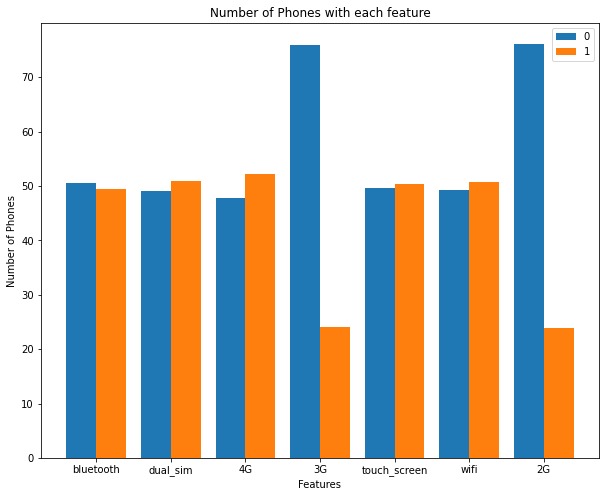

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi', '2G']

no_0 = []
for elem in categorical_columns:
    no_0.append((df[elem].value_counts()/len(df[elem])*100)[0])
no_1 = []
for elem in categorical_columns:
    no_1.append((df[elem].value_counts()/len(df[elem])*100)[1])

X_axis = np.arange(len(X))
plt.figure(figsize=(10,8))
plt.bar(X_axis - 0.2, no_0, 0.4, label = 0)
plt.bar(X_axis + 0.2, no_1, 0.4, label = 1)
plt.xticks(X_axis, X)
plt.xlabel("Features")
plt.ylabel("Number of Phones")
plt.title("Number of Phones with each feature")
plt.legend()
plt.show()


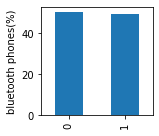

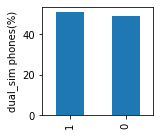

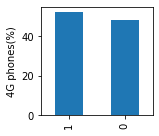

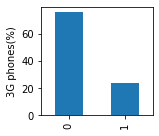

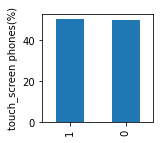

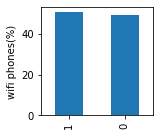

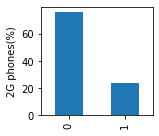

In [ ]:
for var in categorical_columns:
    plt.figure(figsize=(2,2))
    fig = (df[var].value_counts()/len(df[var])*100).plot.bar()
    fig.set_ylabel(f'{var} phones(%)')

### Note: 
1. Out of total phones, there are 52.15% 4G, 24.0% 3G, and 23.85% 2G.
2. Phone with: dual_sim(50.95%), wifi(50.7%), touch_screen(50.3%), bluetooth(49.5%)

In [ ]:
# Numerical Columns
df[numerical_columns].describe()

,battery_power(mAh),clock_speed(GHz),front_camera(MP),int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


#### No outlier

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


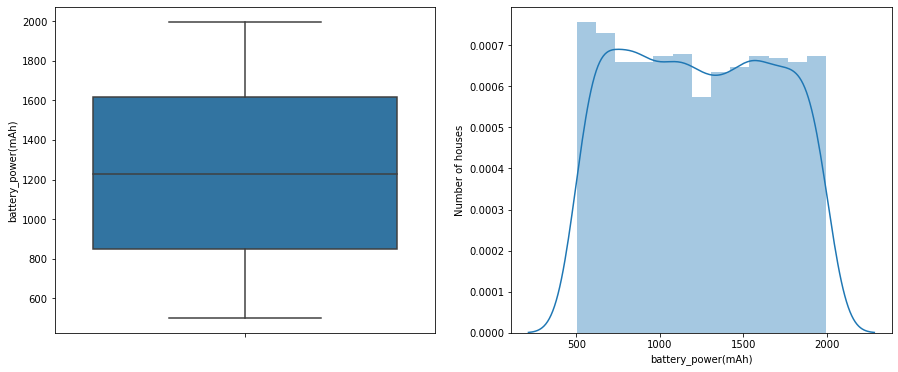

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


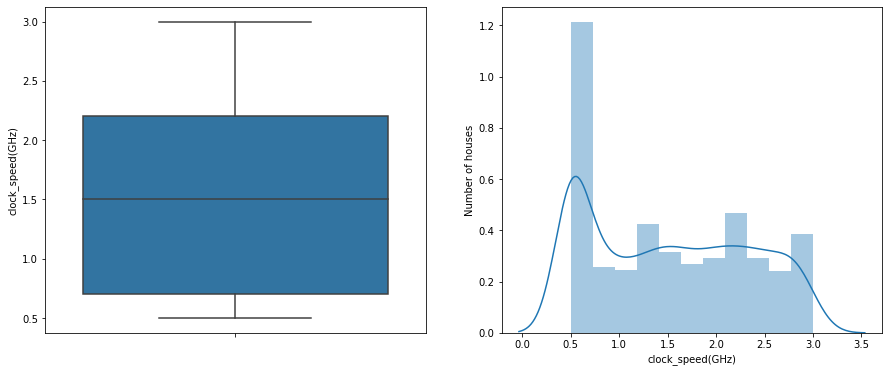

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


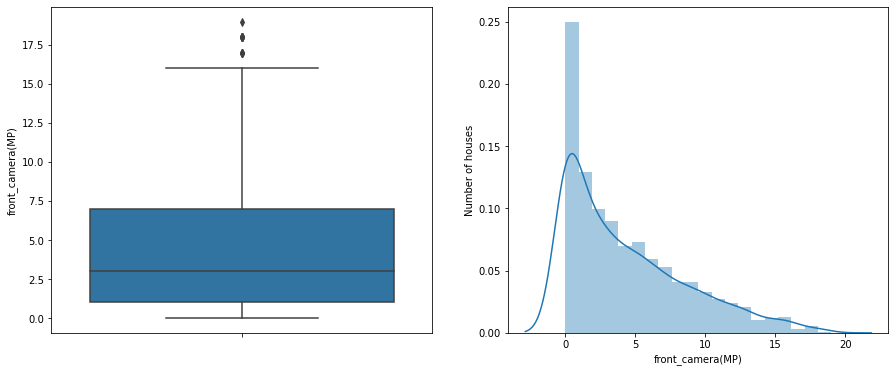

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


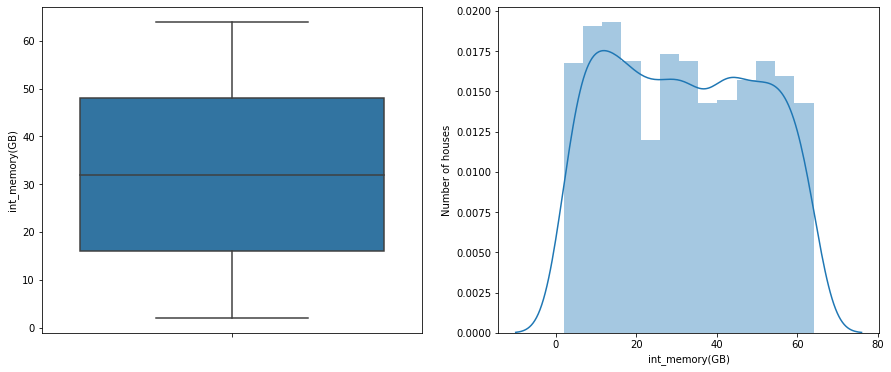

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


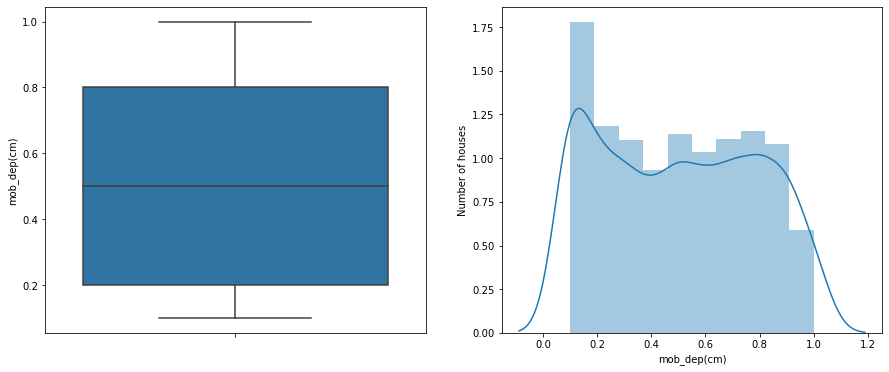

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


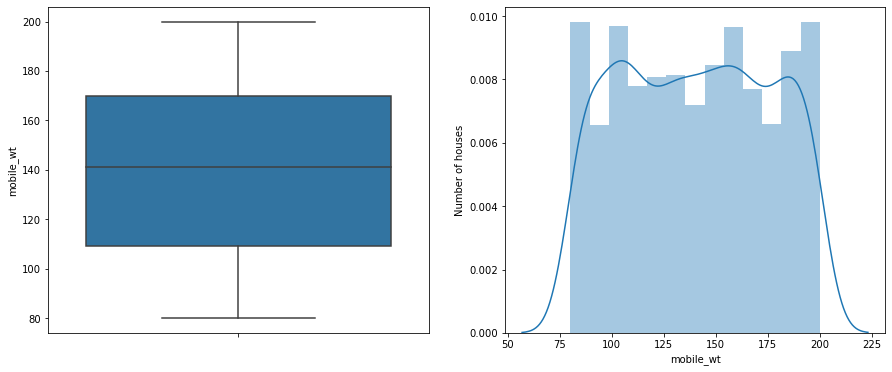

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


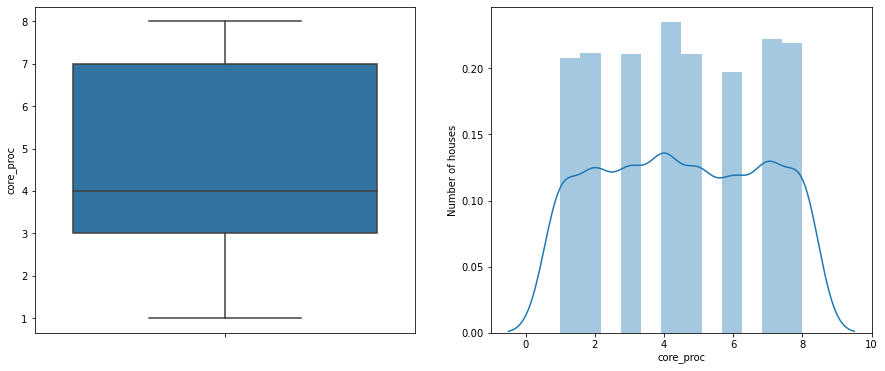

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


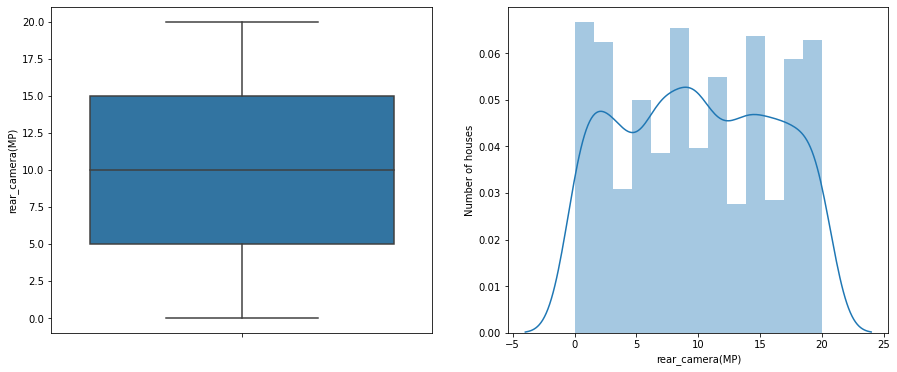

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


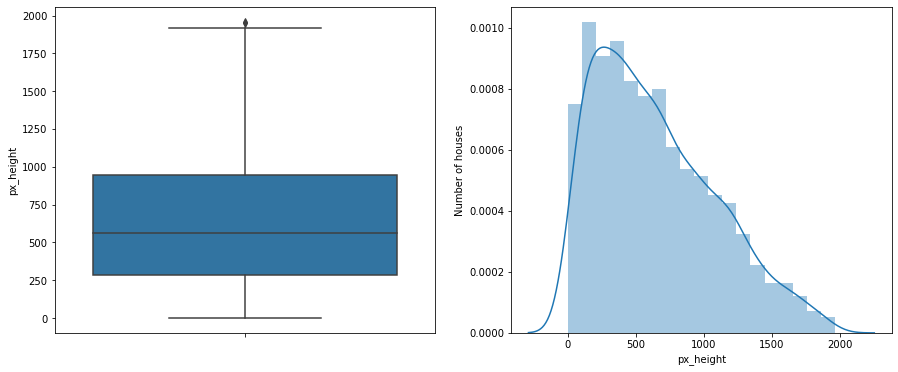

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


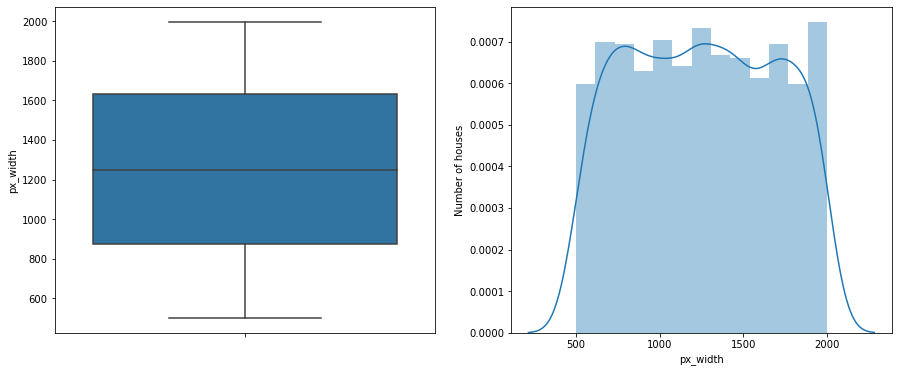

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


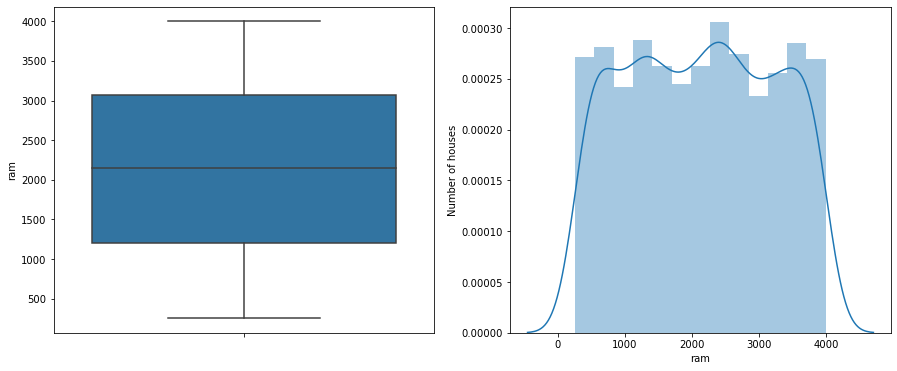

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


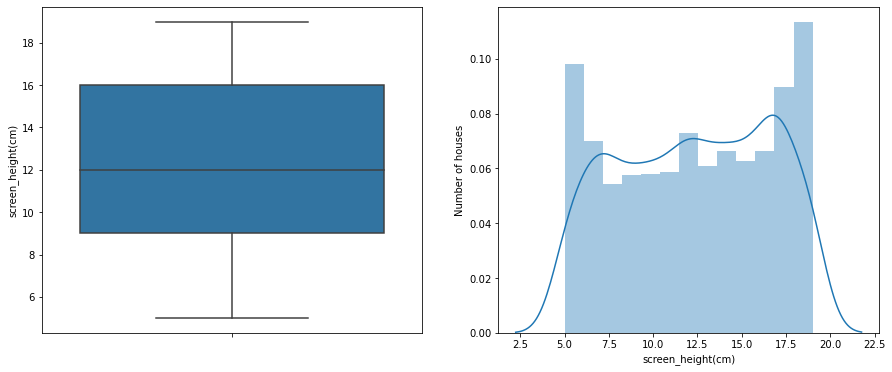

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


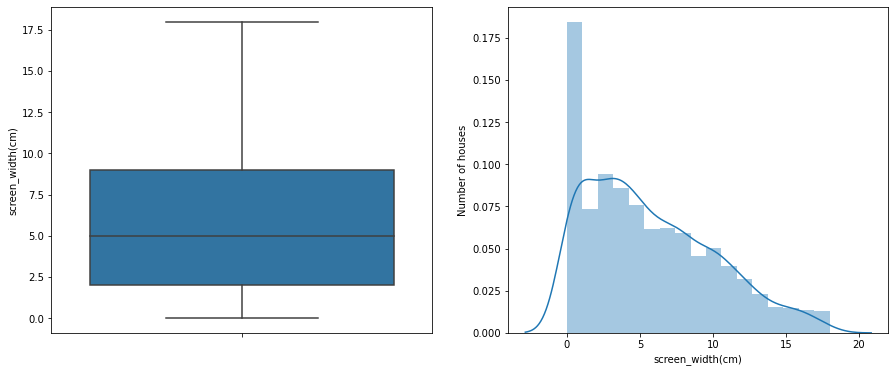

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


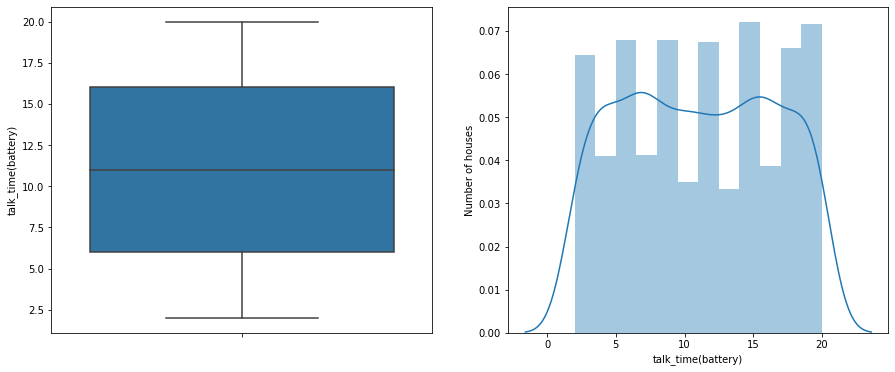

In [ ]:
# Univariate Analysis of Numerical Columns
for var in numerical_columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

### Note:
Most of numerical columns has unsymmetric and random distribution

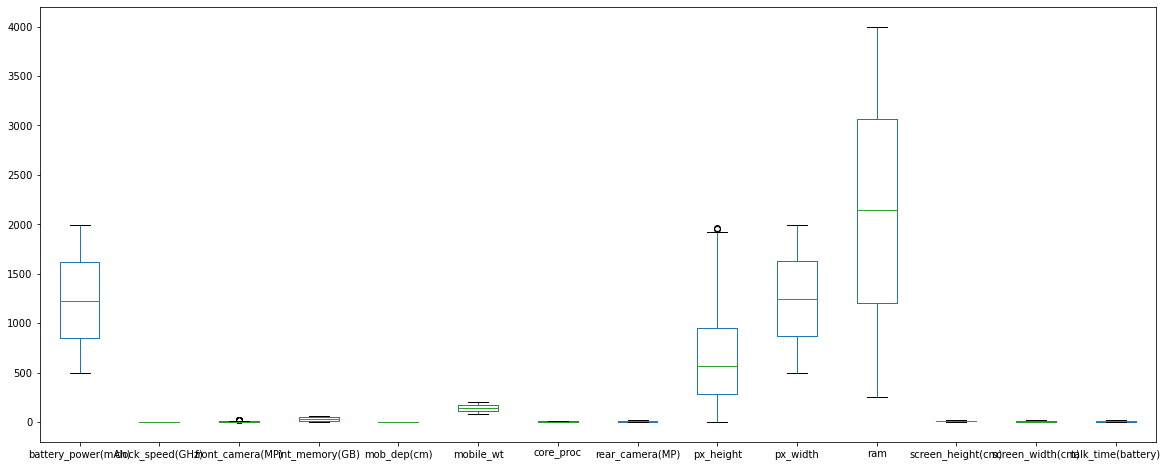

In [ ]:
df[numerical_columns].plot(kind='box',figsize=(20,8))
plt.show()

### Observations:
1. Battery power(mAh) - 500 to 2000 with 1250 median
2. px_height - 282 to 950 with 560 median and outliers of 0 and 1950
3. px_width - 500 to 2000 with 1200 median
4. Ram(MB) - 250 to 3900 with 2100 median

Most of the features underestimated in the graph. Let's break them down.

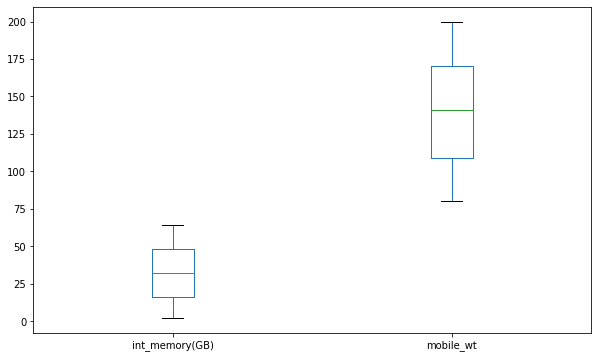

In [ ]:
numerical_columns2 = ['int_memory(GB)','mobile_wt']
df[numerical_columns2].plot(kind='box',figsize=(10,6))
plt.show()

### Observations:
1. Internal Memory(GB) - 2 to 64 with 32 median
2. Mobile weight(gram) - 80 to 200 with 140 median

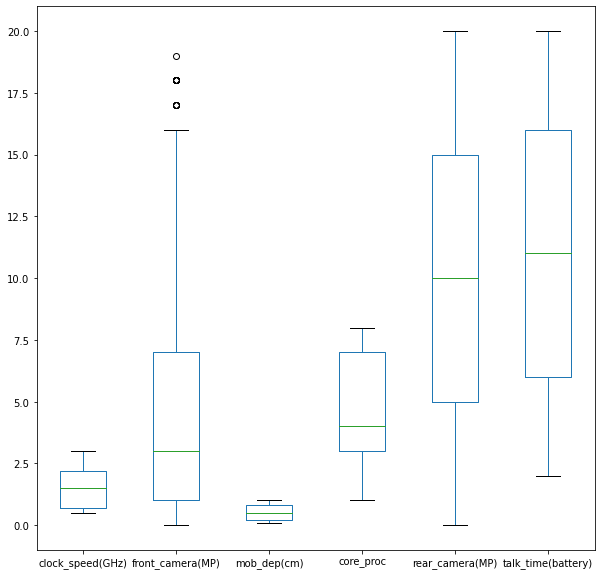

In [ ]:
numerical_columns3 = ['clock_speed(GHz)', 'front_camera(MP)', 'mob_dep(cm)', 'core_proc', 'rear_camera(MP)','talk_time(battery)']
df[numerical_columns3].plot(kind='box',figsize=(10,10))
plt.show()

### Observations:
1. Clock Speed(GHz) - 0.5 to 3 with 1.5 median
2. front camera(MP) - 1 to 19 with 3 median
3. rear camera(MP) - 5 to 20 with 10 median
4. mobile depth(cm) - 0.1 to 1 with 0.5 median
5. core processor - 1 to 8 with 4 median
6. talk time(battery)(in hours) - 2 to 20 with 11 median

### Bivariate Analysis

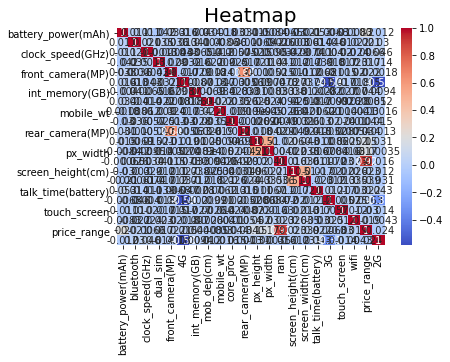

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (15,18)
plt.show()

<AxesSubplot:>

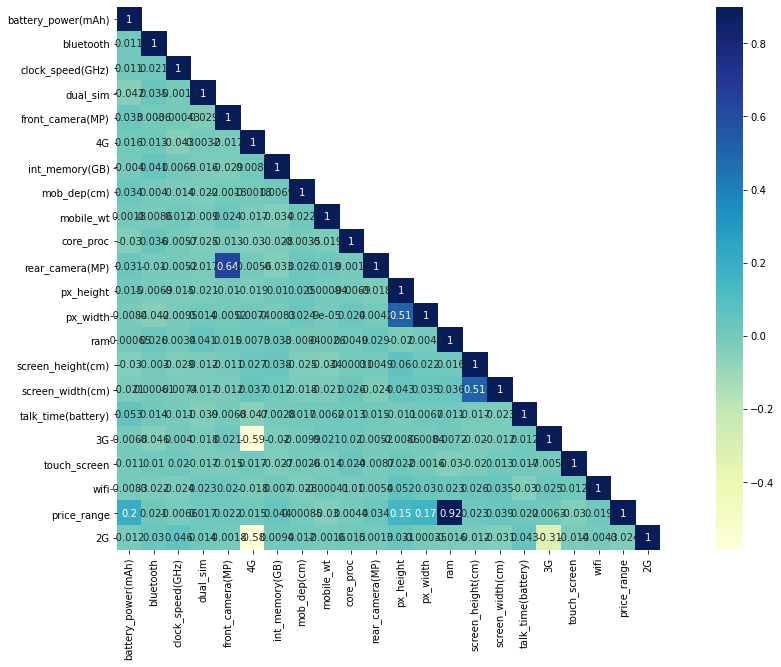

In [ ]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Notes:
Independent variables with high correlation:
1. rear_camera(MP) with front_camera(MP)
2. 4G with 3G and 2G (Negative)
3. px_width with px_height
4. screen_height(cm) with screen_width(cm)

Dependent correlation with independent with high values:
1. ram(0.92)
2. px_width(0.17) and px_height(0.15)
3. battery_power(mAh)(0.2)

In [ ]:
df['screen_size(inch)'] = np.sqrt((df['screen_height(cm)'])**2 + (df['screen_width(cm)'])**2)*0.393 

In [ ]:
df.drop(['screen_height(cm)','screen_width(cm)'], axis=1, inplace=True)

In [ ]:
numerical_columns.pop(-2)
numerical_columns.pop(-2)

'screen_height(cm)'

In [ ]:
categorical_columns

['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi', '2G']

In [ ]:
_1data = []
for elem in categorical_columns:
    _1data.append(pd.crosstab(df[elem],df['price_range'])[1:2].sum())
df_cat_comp = pd.DataFrame(_1data, columns=[0,1,2,3], index=['bluetooth', 'dual_sim', '4G', '3G','2G', 'touch_screen', 'wifi'])

In [ ]:
df_cat_comp

,0,1,2,3
bluetooth,243,245,243,259
dual_sim,250,255,249,265
4G,259,262,247,275
3G,114,116,140,110
2G,262,261,235,248
touch_screen,248,252,252,262
wifi,127,122,113,115


,bluetooth,dual_sim,4G,3G,2G,touch_screen,wifi
0,243,250,259,114,262,248,127
1,245,255,262,116,261,252,122
2,243,249,247,140,235,252,113
3,259,265,275,110,248,262,115


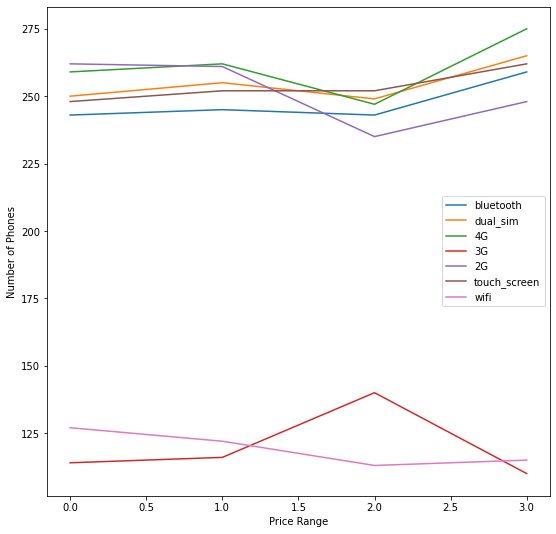

In [ ]:
from IPython.display import display, HTML
t_table = df_cat_comp.transpose()
display(t_table)
plt.figure(figsize=(9,9))
plt.plot(t_table['bluetooth'])
plt.plot(t_table['dual_sim'])
plt.plot(t_table['4G'])
plt.plot(t_table['3G'])
plt.plot(t_table['2G'])
plt.plot(t_table['touch_screen'])
plt.plot(t_table['wifi'])
plt.legend(['bluetooth','dual_sim','4G','3G','2G','touch_screen','wifi'])
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

In [ ]:
# Bivariate analysis for price_range vs categorical columns
print(pd.crosstab(df['bluetooth'],df['price_range']))
print(pd.crosstab(df['dual_sim'],df['price_range']))
print(pd.crosstab(df['4G'],df['price_range']))
print(pd.crosstab(df['3G'],df['price_range']))
print(pd.crosstab(df['2G'],df['price_range']))
print(pd.crosstab(df['touch_screen'],df['price_range']))
print(pd.crosstab(df['wifi'],df['price_range']))

price_range    0    1    2    3
bluetooth                      
0            257  255  257  241
1            243  245  243  259
price_range    0    1    2    3
dual_sim                       
0            250  245  251  235
1            250  255  249  265
price_range    0    1    2    3
4G                             
0            241  238  253  225
1            259  262  247  275
price_range    0    1    2    3
3G                             
0            386  384  360  390
1            114  116  140  110
price_range    0    1    2    3
2G                             
0            373  378  387  385
1            127  122  113  115
price_range     0    1    2    3
touch_screen                    
0             238  239  265  252
1             262  261  235  248
price_range    0    1    2    3
wifi                           
0            252  248  248  238
1            248  252  252  262


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


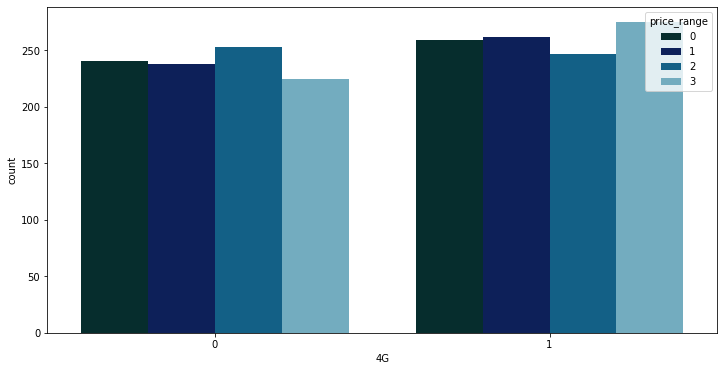

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(df['4G'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

### Note:
1. There are higher demand of 4G phone than others in price range 3,i.e., at high price
2. Out of 4 price_range, people prefer 2G phone more as compared to 3G in the 3 price ranges(0,1, and 3)
3. In price range2, there are lesser 4G demand than the sum of 2G and 3G.

In [ ]:
numerical_columns

['battery_power(mAh)',
 'clock_speed(GHz)',
 'front_camera(MP)',
 'int_memory(GB)',
 'mob_dep(cm)',
 'mobile_wt',
 'core_proc',
 'rear_camera(MP)',
 'px_height',
 'px_width',
 'ram',
 'talk_time(battery)']

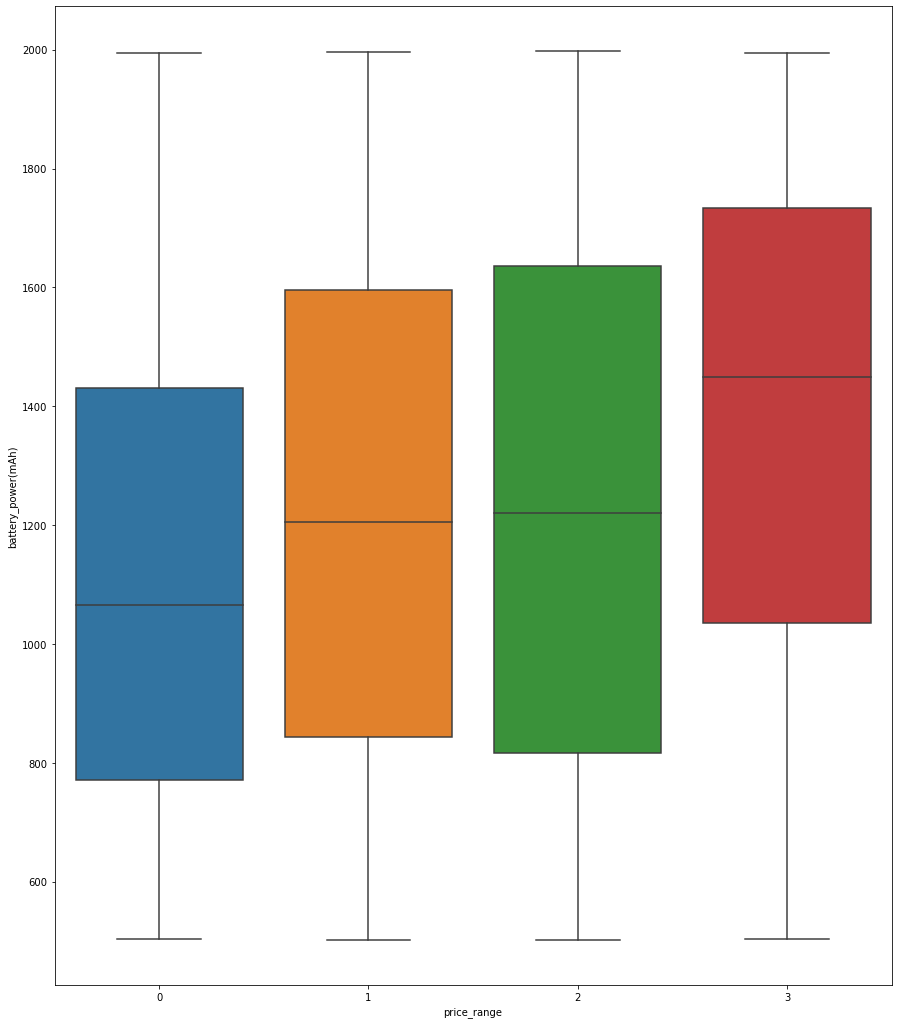

In [ ]:
sns.boxplot(y = 'battery_power(mAh)' , x = 'price_range',data= df)
plt.show()

1. As expected, higher price range has more battery power.
2. Price range 2 has the maximum range of battery power options.

Text(0, 0.5, 'battery_power(mAh)')

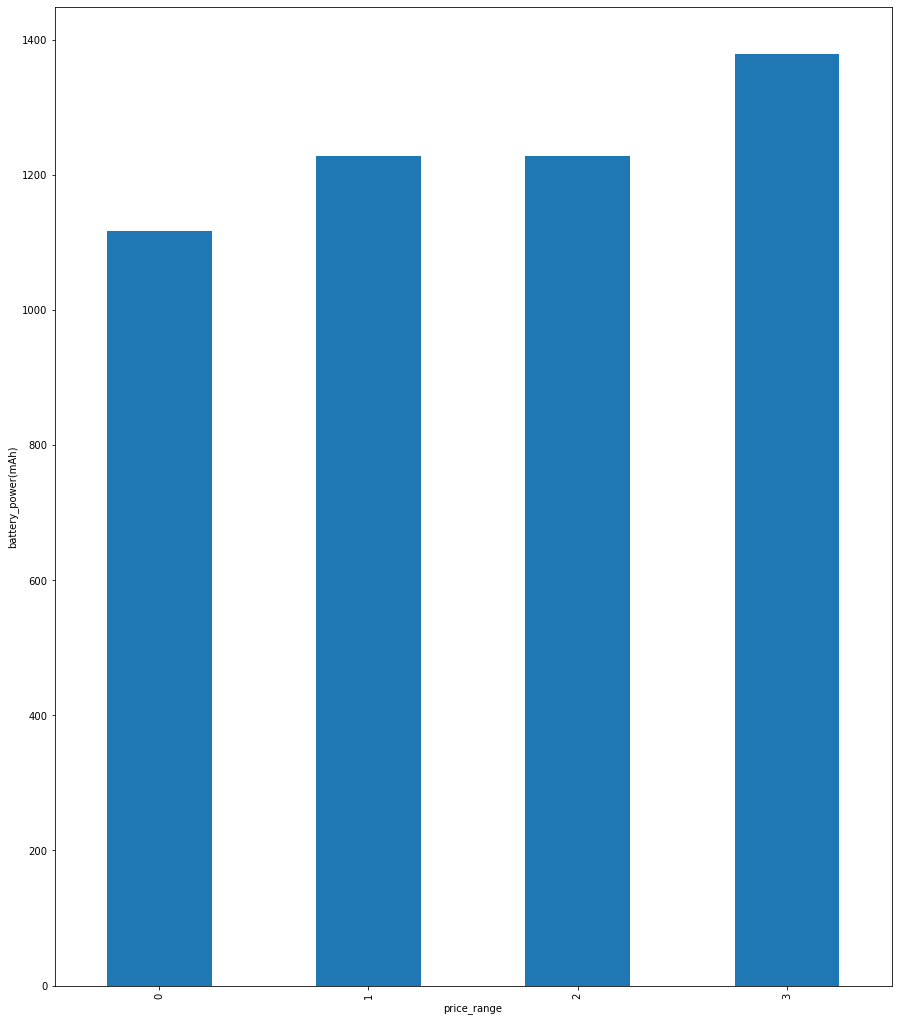

In [ ]:
df.groupby('price_range')['battery_power(mAh)'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('battery_power(mAh)')

Text(0, 0.5, 'Ram(MB)')

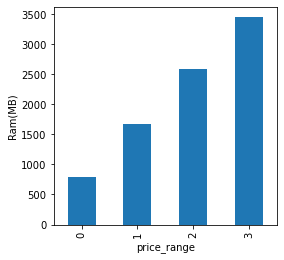

In [ ]:
df.groupby('price_range')['ram'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('Ram(MB)')

Text(0, 0.5, 'touch_screen')

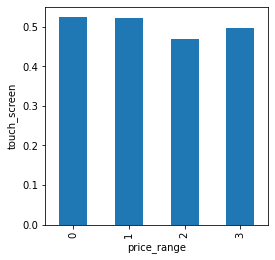

In [ ]:
df.groupby('price_range')['touch_screen'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('touch_screen')

Text(0, 0.5, 'wifi')

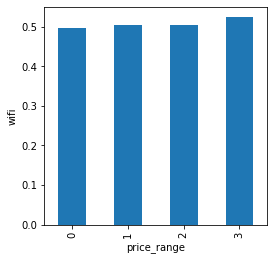

In [ ]:
df.groupby('price_range')['wifi'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('wifi')

Text(0, 0.5, 'bluetooth')

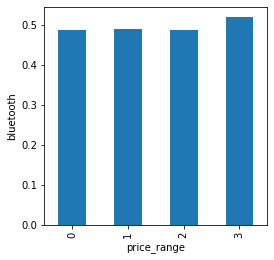

In [ ]:
df.groupby('price_range')['bluetooth'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('bluetooth')

Text(0, 0.5, 'rear_camera(MP)')

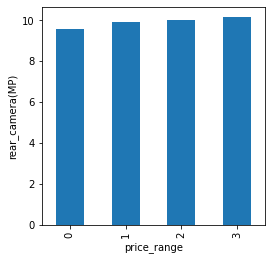

In [ ]:
df.groupby('price_range')['rear_camera(MP)'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('rear_camera(MP)')

### Multivariate Analysis:

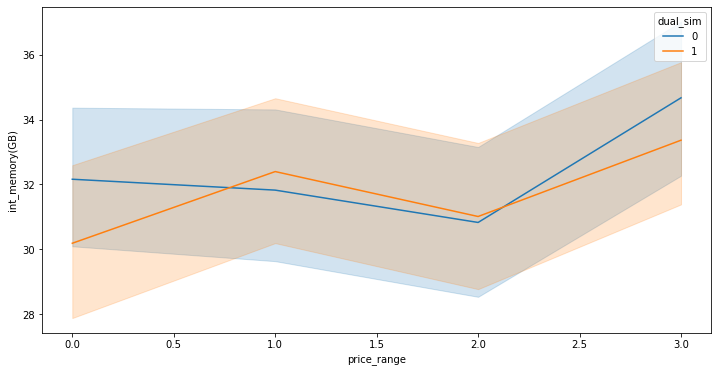

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory(GB)' , data = df , hue = 'dual_sim')
plt.show()

### Tabular Analysis:

#### Considering the primary and secondary features

In [ ]:
df_class = df.groupby(['price_range','dual_sim','4G']).count().drop(['battery_power(mAh)','clock_speed(GHz)','front_camera(MP)', 'int_memory(GB)',
       'mob_dep(cm)', 'mobile_wt', 'rear_camera(MP)', 'px_height', 'px_width',
       'ram', 'talk_time(battery)','core_proc','3G','2G','touch_screen','wifi','bluetooth'], axis=1).rename(columns={'screen_size(inch)':'No. of Phones'})

In [ ]:
df_class

No. of Phones
price_range dual_sim 4G               
0           0        0             128
                     1             122
            1        0             113
                     1             137
1           0        0             114
                     1             131
            1        0             124
                     1             131
2           0        0             125
                     1             126
            1        0             128
                     1             121
3           0        0             104
                     1             131
            1        0             121
                     1             144

#### Considering all features

In [ ]:
df_class = df.groupby(['core_proc','price_range','touch_screen','dual_sim','4G','3G','2G','wifi','bluetooth']).count().drop(['battery_power(mAh)','clock_speed(GHz)','front_camera(MP)', 'int_memory(GB)',
       'mob_dep(cm)', 'mobile_wt', 'rear_camera(MP)', 'px_height', 'px_width',
       'ram', 'talk_time(battery)'], axis=1).rename(columns={'screen_size(inch)':'No. of Phones'})

In [ ]:
df_class['No. of Phones'].unique()

array([1, 2, 3, 5, 4, 6], dtype=int64)

In [ ]:
df_class[df_class['No. of Phones']==6].shape

(6, 1)

### Notedowns:
1. There are 517 specification combinations for no. of phones=1
2. There are 324 specification combinations for no. of phones=2
3. There are 139 specification combinations for no. of phones=3
4. There are 63 specification combinations for no. of phones=4
5. There are 26 specification combinations for no. of phones=5
6. There are 6 specification combinations for no. of phones=6

Meaning: More is the specification combinations, lesser is the no. of phones

In [ ]:
print('Specification Combination with highest number of phones:')
df_class[df_class['No. of Phones']==6]

Specification Combination with highest number of phones:


No. of Phones
core_proc price_range touch_screen dual_sim 4G 3G 2G wifi bluetooth               
3         0           1            0        1  0  0  0    0                      6
          3           0            1        1  0  0  1    0                      6
4         2           0            0        1  0  0  1    1                      6
5         1           0            1        1  0  0  0    1                      6
          3           1            1        1  0  0  1    1                      6
6         3           1            1        1  0  0  1    1                      6

In [ ]:
# Most demanding 2G phones
_1 = _2G_df[_2G_df['core_proc']==8]
_2 = _1[_1['price_range']==2]
_3 = _2[_2['dual_sim']==1]
_4 = _3[_3['bluetooth']==1]
print('Most demanding 2G phones:')
_4[_4['touch_screen']==1]

Most demanding 2G phones:


,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range,2G
120,1701,1,1.6,1,3,0,10,0.3,194,8,7,550,1338,2598,12,9,6,0,1,0,2,1
227,1151,1,2.9,1,0,0,31,0.6,128,8,1,1022,1560,2377,18,8,13,0,1,0,2,1
588,1966,1,1.4,1,2,0,40,0.9,185,8,18,1197,1987,1185,11,2,20,0,1,0,2,1
1079,1893,1,0.5,1,1,0,23,0.1,179,8,3,1203,1432,1482,15,7,17,0,1,0,2,1
1776,1072,1,2.2,1,6,0,19,0.4,114,8,16,380,877,2715,15,9,16,0,1,0,2,1


In [ ]:
# Most demanding 3G phones
_1 = _3G_df[_3G_df['core_proc']==4]
_2 = _1[_1['price_range']==1]
_3 = _2[_2['wifi']==1]
_4 = _3[_3['touch_screen']==1]
_5 = _4[_4['bluetooth']==0]
print('Most demanding 3G phones:')
_5[_5['dual_sim']==0]

Most demanding 3G phones:


,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range
198,609,0,0.5,0,3,0,26,0.3,93,4,4,938,1948,1866,11,10,14,1,1,1,1
1213,1177,0,0.9,0,1,0,11,1.0,181,4,7,945,1923,1887,8,5,11,1,1,1,1
1524,1162,0,1.0,0,0,0,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1,1
1567,940,0,2.9,0,0,0,16,0.7,115,4,1,499,1090,2192,15,13,9,1,1,1,1
1964,1753,0,0.7,0,4,0,40,0.6,191,4,11,1652,1983,1112,8,2,15,1,1,1,1


In [ ]:
# Most demanding 4G phones
df_class[df_class['No. of Phones']==6]
_1 = _4G_df[_4G_df['wifi']==1]
_2 = _1[_1['touch_screen']==1]
_3 = _2[_2['bluetooth']==1]
d_4G = _3[_3['dual_sim']==1]
print('Most demanding 4G phones:')
d_4G.loc[(d_4G['battery_power(mAh)']>1500) & (d_4G['clock_speed(GHz)']>1.0) & (d_4G['int_memory(GB)']>12) & (d_4G['rear_camera(MP)']>7) & (d_4G['ram']>2000)]

Most demanding 4G phones:


,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range
187,1934,1,2.6,1,0,1,46,0.1,103,1,17,619,1299,2940,13,9,2,0,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,0,1,1,3
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,0,1,1,3
821,1883,1,2.7,1,6,1,30,0.5,95,2,10,531,791,3724,16,15,20,0,1,1,3
906,1983,1,1.2,1,6,1,27,0.6,125,1,11,370,1197,3897,12,10,10,0,1,1,3
1129,1562,1,1.2,1,0,1,52,0.1,105,7,9,480,728,2829,13,10,3,0,1,1,2
1658,1812,1,1.3,1,4,1,42,1.0,162,7,15,380,1550,3338,18,13,11,0,1,1,3


Pie chart for generation based phones:


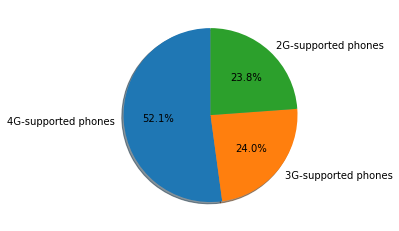

In [ ]:
#percentage of phones which support 4G, 3G, 2G
labels = ['4G-supported phones','3G-supported phones','2G-supported phones']
values=df['4G'].value_counts()[1], df['3G'].value_counts()[1], df['2G'].value_counts()[1]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
print('Pie chart for generation based phones:')
plt.show()

## Model Building

### Splitting dataset

In [ ]:
x = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
x.shape, y.shape

((2000, 20), (2000,))

### importing essential modules for machine learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

### Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 20), (1600,), (400, 20), (400,))

### Fitting the model

In [ ]:
models = [ ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['KNeighborsClassifier: ',  neighbors.KNeighborsClassifier()],
           ['SVC:' , SVC()],
           ['RandomForestClassifier',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBClassifier: ', xgb.XGBClassifier()],
           ['LogisticRegression: ',LogisticRegression()]
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(x_train,y_train)
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=200)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(x_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(x_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(x_test)))
    model_data.append(curr_model_data)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_data

[{'Name': 'DecisionTreeClassifier: ',
  'Train_Time': 0.021165847778320312,
  'Train_R2_Score': 0.9658577870134696,
  'Test_R2_Score': 0.9684217278248984,
  'Test_RMSE_Score': 0.2},
 {'Name': 'KNeighborsClassifier: ',
  'Train_Time': 0.006227970123291016,
  'Train_R2_Score': 0.9638494215436736,
  'Test_R2_Score': 0.9388170976607408,
  'Test_RMSE_Score': 0.2783882181415011},
 {'Name': 'SVC:',
  'Train_Time': 0.07271027565002441,
  'Train_R2_Score': 0.9613389647064288,
  'Test_R2_Score': 0.9664480858139546,
  'Test_RMSE_Score': 0.20615528128088303},
 {'Name': 'RandomForestClassifier',
  'Train_Time': 0.514822244644165,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.9171070355403586,
  'Test_RMSE_Score': 0.324037034920393},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 2.4870524406433105,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.9388170976607408,
  'Test_RMSE_Score': 0.2783882181415011},
 {'Name': 'XGBClassifier: ',
  'Train_Time': 0.7508399486541748,
  'Train_R2_Score': 1

In [ ]:
result_df = pd.DataFrame(model_data)

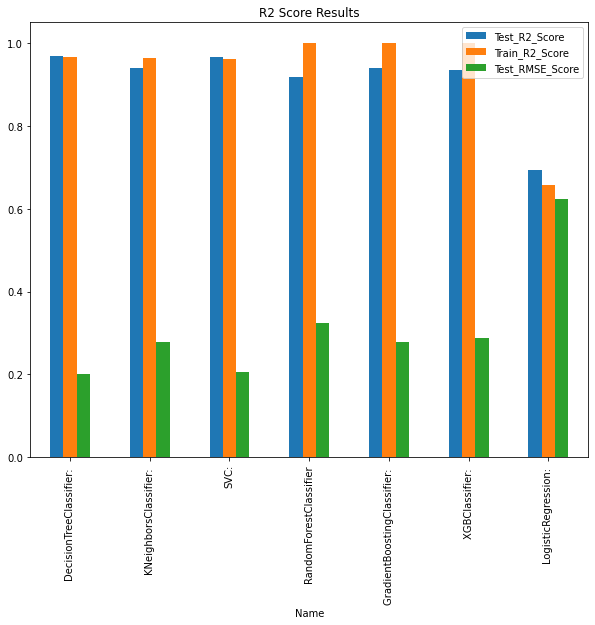

In [ ]:
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

### ExtraTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(x_train,y_train)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=341)
cls.score(x_test,y_test)

0.96

In [ ]:
y_pred_test = cls.predict(x_test)
y_pred_train = cls.predict(x_train)

In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.934737297226743
Test Score:0.9468291986470985
MAE:0.0475
MSE:0.0675
RMSE :  0.259808


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion matrices for train and test 

print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred_test))

[[387   8   1   0]
 [ 13 371  15   0]
 [  1  24 363  17]
 [  2   1  23 374]]
[[103   1   0   0]
 [  1  97   3   0]
 [  1   5  88   1]
 [  1   0   3  96]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       396
           1       0.92      0.93      0.92       399
           2       0.90      0.90      0.90       405
           3       0.96      0.94      0.95       400

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       104
           1       0.94      0.96      0.95       101
           2       0.94      0.93      0.93        95
           3       0.99      0.96      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      

### Conclusive test r2 score:
1. Decision tree classifier - 96.8%
2. KNN - 93.8%
3. SVC - 96.6%
4. Random forest classifier- 91.7%
5. GBC - 93.8%
6. XGB Classifier- 93.5%
7. Logistic Regressor - 69.4%
8. ExtraTreeClassifier - 94.7%

## Performing hyperparameter tuning

### In GBC

In [ ]:
# Specifying the hyperparameter values 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('gb', GradientBoostingClassifier())])
params = {'gb__n_estimators':[50,100]}

# Instantiate the grid search model
grid_search = GridSearchCV(pipe, params, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('gb', GradientBoostingClassifier())]),
             n_jobs=-1, param_grid={'gb__n_estimators': [50, 100]})

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'gb__n_estimators': 100}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

Pipeline(steps=[('gb', GradientBoostingClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.best_estimator_.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9


In [ ]:
# R2 score on training set with tuned parameters
Train_R2_Score = grid_search.best_estimator_.score(x_train,y_train)
Train_R2_Score

0.9983333333333333

In [ ]:
# R2 score on test set with tuned parameters
Test_R2_Score = grid_search.best_estimator_.score(x_test,y_test)
Test_R2_Score

0.9

In [ ]:
# RMSE score on test set with tuned parameters
from sklearn.metrics import mean_squared_error
Test_RMSE_Score = np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(x_test)))
Test_RMSE_Score

0.31622776601683794

#### Generating confusion matrix array and store it in a variable called conmat

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)

#### Now, let’s create a dataframe from the confusion matrix array, called df_cm

In [ ]:
val = np.mat(con_mat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

    0   1   2   3
0  44   2   0   0
1   1  47   3   0
2   0   3  47   2
3   0   0   9  42


#### Visualizing the confusion matrix

<ipython-input-149-36001cde503c>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


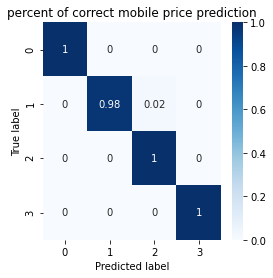

In [ ]:
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('percent of correct mobile price prediction')
plt.show()    

### Conclusion:
The model predicted 96% of 0-range phone as 0-range correctly, similary 92% of 1-range as 1-range, 90% of 2-range as 2-range and 82% of 3-range as 3-range.

### In DTC

In [ ]:
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)
from sklearn.tree import DecisionTreeClassifier
model_D = DecisionTreeClassifier(max_leaf_nodes= 150, max_depth=15, random_state=0)
model_D.fit(x_train, y_train)
end =  time.time()
train_time = end - start
print(f'Train Time: {train_time}')

Train Time: 0.02803778648376465


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=341)
y_pred_test = model_D.predict(x_test)
y_pred_train = model_D.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred_test))

Accuracy:  0.995


In [ ]:
from sklearn import metrics 
# Computing scores
print(f'Train Score:{metrics.r2_score(y_train,y_pred_train)}')
print(f'Test Score:{metrics.r2_score(y_test,y_pred_test)}')

# Computing errors
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred_test)}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE : % f" %(rmse))

Train Score:0.9844855710885908
Test Score:0.9958962573867367
MAE:0.005
MSE:0.005
RMSE :  0.070711


#### Generating confusion matrix array and store it in a variable called conmat

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred_test)

#### Now, let’s create a dataframe from the confusion matrix array, called df_cm

In [ ]:
val = np.mat(con_mat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

    0   1   2   3
0  46   0   0   0
1   0  50   1   0
2   0   0  52   0
3   0   0   0  51


#### Visualizing the confusion matrix

<ipython-input-148-6c5d72adf681>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


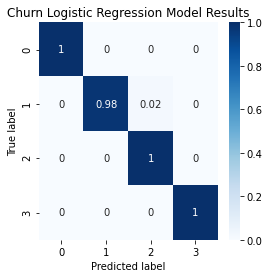

In [ ]:
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('percent of correct mobile price prediction')
plt.show()    

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Confusion matrices for train and test 

print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

# Print the classification report for train and test
print(classification_report(y_train,y_pred_train))
print("\n")
print(classification_report(y_test,y_pred_test))

[[451   3   0   0]
 [  5 436   8   0]
 [  0   5 436   7]
 [  0   0   7 442]]
[[46  0  0  0]
 [ 0 50  1  0]
 [ 0  0 52  0]
 [ 0  0  0 51]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       454
           1       0.98      0.97      0.98       449
           2       0.97      0.97      0.97       448
           3       0.98      0.98      0.98       449

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      0.98      0.99        51
           2       0.98      1.00      0.99        52
           3       1.00      1.00      1.00        51

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99  

#### Confusion matrix is also declaring the DTC model the most efficient one.

### Visualizing the data classification with DTC

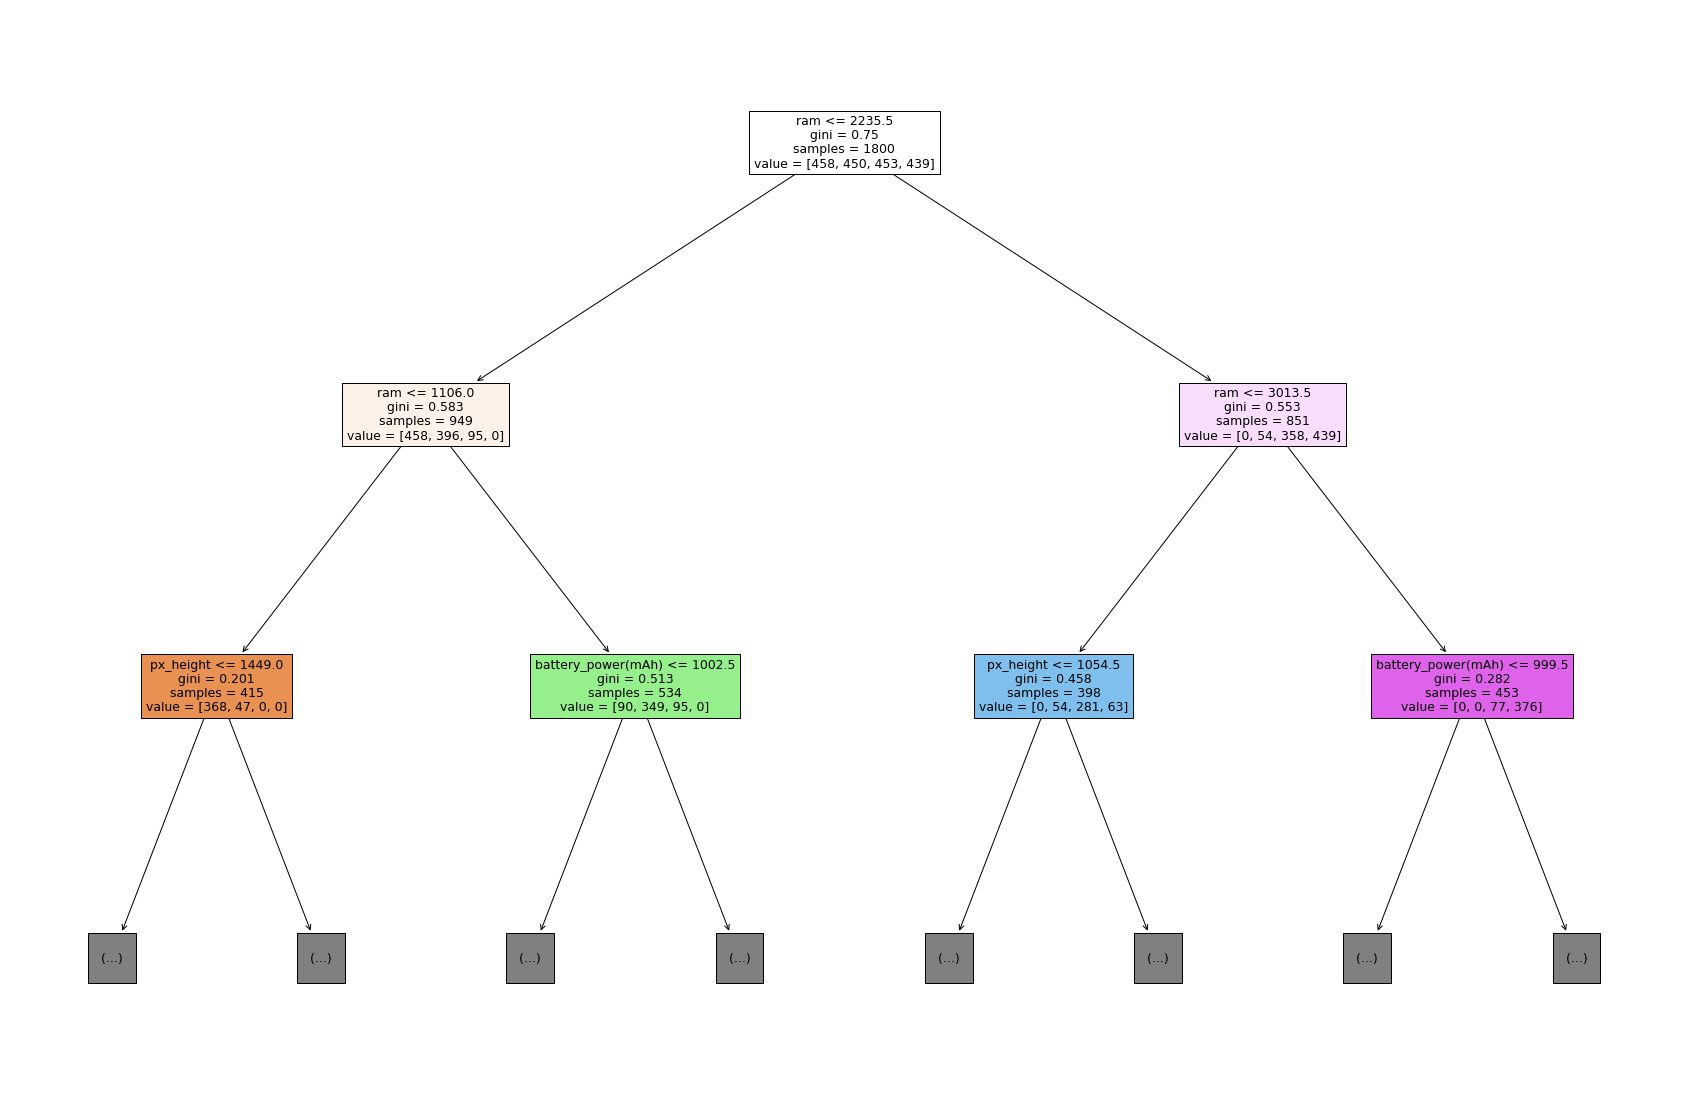

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(30,20))
plot_tree(model_D, feature_names=x_train.columns, max_depth=2, filled=True);

### Conclusion:
1. Decision tree before hyperparameter tuning had 96.8% test accuracy with train time 0.03 seconds and rmse score 0.2. While after hyperparameter tuning, it increased to 99.58% with train time 0.03 seconds and rmse 0.07.

### Perform some predictions with input values(mobile features) to get the price range.

### Performing some predictions

In [ ]:
input1 = x_test.iloc[1:2,:]
input1

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,talk_time(battery),3G,touch_screen,wifi,2G,screen_size(inch)
807,1312,0,1.3,0,5,1,10,0.6,163,2,9,95,893,3941,13,0,1,1,0,2.48555


In [ ]:
result = y_test[input1.index]
result

807    3
Name: price_range, dtype: int64

In [ ]:
x_test[1:2]

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,talk_time(battery),3G,touch_screen,wifi,2G,screen_size(inch)
807,1312,0,1.3,0,5,1,10,0.6,163,2,9,95,893,3941,13,0,1,1,0,2.48555


In [ ]:
# result with tuned gradient boosting classifier
grid_search.predict([[1312,0,1.3,0,5,1,10,0.6,163,2,9,95,893,3941,13,0,1,1,0,2.48555]])

array([3], dtype=int64)

In [ ]:
# result with tuned decision tree classifier
model_D.predict([[1312,0,1.3,0,5,1,10,0.6,163,2,9,95,893,3941,13,0,1,1,0,2.48555]])

array([3], dtype=int64)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Try yourself  (press shift+enter and input the values in 3rd cell)

In [ ]:
input2 = x_test[100:101]
input2

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,talk_time(battery),3G,touch_screen,wifi,2G,screen_size(inch)
1487,761,1,0.5,0,9,0,3,0.8,196,7,15,1325,1945,2248,15,1,1,1,0,7.559506


In [ ]:
y_test[input2.index]

1487    2
Name: price_range, dtype: int64

In [ ]:
a = int(input('battery_power(mAh):'))
b = int(input('blutooth(1/0):'))  # 1 if yes, 0 if no
c = float(input('clock_speed(GHz):'))
d = int(input('dual_sim(1/0):'))
e = int(input('front_camera(MP):'))
f = int(input('4G(1/0):'))
g = int(input('int_memory(GB):'))
h = float(input('mob_dep(cm):'))
i = int(input('mobile_wt(g):'))
j = int(input('core_proc(number)'))
k = int(input('rear_camera(MP):'))
l = int(input('px_height:'))
m = int(input('px_width:'))
n = int(input('ram(MB):'))
o = int(input('talk_time(battery-hours):'))
p = int(input('3G(1/0):'))
q = int(input('touch_screen(1/0):'))
r = int(input('wifi(1/0):'))
s = int(input('2G(1/0:'))
t = float(input('screen_size(inch):'))


battery_power(mAh):761
blutooth(1/0):1
clock_speed(GHz):0.5
dual_sim(1/0):0
front_camera(MP):9
4G(1/0):0
int_memory(GB):3
mob_dep(cm):0.8
mobile_wt(g):196
core_proc(number)7
rear_camera(MP):15
px_height:1325
px_width:1945
ram(MB):2248
talk_time(battery-hours):15
3G(1/0):1
touch_screen(1/0):1
wifi(1/0):1
2G(1/0:0
screen_size(inch):7.56


In [ ]:
list1 = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]
x = model_D.predict([list1])
print('Final Prediction:')
print(f'{x} is the price range for the input mobile features')

Final Prediction:
[2] is the price range for the input mobile features


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------